(80, 32)
-0.9991548657417297
1.7716493606567383


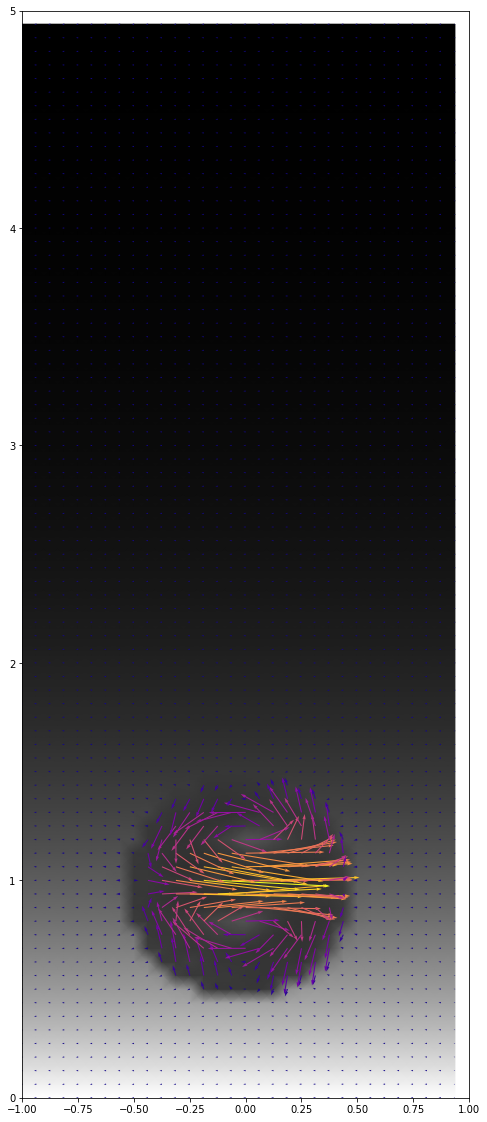

In [141]:
#view slice at y=0 of B field spheromak initial condition

import sys
import time
sys.path.append('/home/asmohov/athena/vis/python/')
sys.path.append('~/.local/lib/python3.8/site-packages/')
sys.path.append('~/working')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import athena_read


file_name = '../mag_bubble/rt.block0.out2.00010.vtk'

data = athena_read.vtk(file_name)
#print(data[-1]['rho'])
#position space
x_coords = data[0][:-1]
z_coords = data[2][:-1]
y_coords = data[1][:-1]
#print(data[-1]['Bcc'].shape) mag field slicing
splice = np.array(data[3]['Bcc'])
splice = splice[:,16,:,:]
#print(splice.shape)
#rho slicing
rho_splice = np.array(data[3]['rho'])
rho_splice = rho_splice[:,16,:]
print(rho_splice.shape)

Bx = splice[:,:,0]
By = splice[:,:,1]
Bz = splice[:,:,2]
Bmag = np.sqrt(Bx*Bx+By*By+Bz*Bz)

fig, ax = plt.subplots(figsize=(8,20))
ax.set_xlim(-1,1)
ax.set_ylim(0,5)
ax.pcolormesh(x_coords,z_coords,rho_splice,shading='gouraud',cmap='binary_r')
q = ax.quiver(x_coords,z_coords,Bx, Bz,Bmag,cmap='plasma')

print(Bx[50,16])
print(rho_splice[16,0])
plt.show()


passing step  0


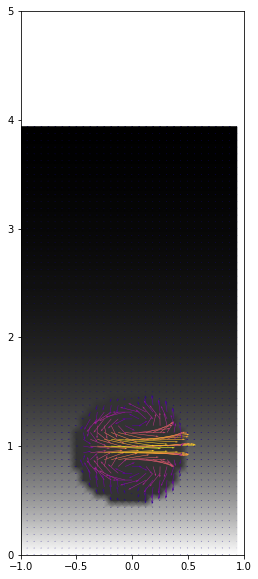

passing step  25
passing step  50
Beginning animation
Run time is  185.1797227859497  seconds
done


In [158]:
#movie making section
sys.path.append('/home/asmohov/athena/vis/python/')
sys.path.append('~/.local/lib/python3.8/site-packages/')
sys.path.append('~/working')
import numpy as np
import time
from matplotlib import pyplot as plt
from celluloid import Camera as cam
import ffmpeg
import matplotlib as mpl
import athena_read
import IPython
from base64 import b64encode
start = time.time()
z=[]
fig, ax = plt.subplots(figsize=(4,10))
Cam = cam(fig)
outrange = range(73)
file_path = '../mag_bubble'
for i in outrange:
        if z != []:
            z.remove()
        if i<10:
            fname = file_path+'/rt.block0.out2.0000'+str(i)+'.vtk'
        elif 9<i<100:
            fname = file_path+'/rt.block0.out2.000'+str(i)+'.vtk'
        elif 99<i<1000:
            fname = file_path+'/rt.block0.out2.00'+str(i)+'.vtk'
        else:
            fname = file_path+'/rt.block0.out2.0'+str(i)+'.vtk'
        if i%25 == 0:
            print('passing step ',i)
        #print(fname)
       #section to make plot
        data = athena_read.vtk(fname)
        x_coords = data[0][:-1]
        z_coords = data[2][:-1]
        y_coords = data[1][:-1]

        splice = np.array(data[3]['Bcc'])
        splice = splice[:,16,:,:]

        rho_splice = np.array(data[3]['rho'])
        rho_splice = rho_splice[:,16,:]


        Bx = splice[:,:,0]
        By = splice[:,:,1]
        Bz = splice[:,:,2]
        Bmag = np.sqrt(Bx*Bx+By*By+Bz*Bz)

        #fig, ax = plt.subplots(figsize=(8,8))
        ax.set_xlim(-1,1)
        ax.set_ylim(0,5)
        ax.pcolormesh(x_coords,z_coords,rho_splice,shading='gouraud',cmap='binary_r')
        q = ax.quiver(x_coords,z_coords,Bx, Bz,Bmag,cmap='plasma')
        plt.show()
        Cam.snap()
print('Beginning animation')
anim = Cam.animate(blit=False,interval=100)
HTML(anim.to_html5_video())
anim.save('bubble_test.mp4',dpi=200)
Video("bubble_test.mp4",embed=True)
print('Run time is ',(time.time()-start),' seconds' )
#play video inline
html = ''
video = open("bubble_test.mp4",'rb').read()
src = 'data:video/mp4;base64,' + b64encode(video).decode()
html += '<video width=500 controls><source src="%s" type="video/mp4"></video>' % src 
IPython.display.HTML(html)

print('done')


In [159]:

IPython.display.HTML(html)

/home/asmohov/athena/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)


5444
5444


Text(0.5, 0, 'cycle number/100')

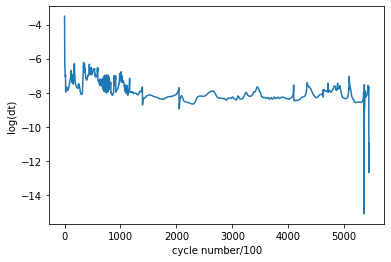

In [155]:
#dt graph

import sys
sys.path.append('~/athena-public-version/vis/python/')
sys.path.append('~/working')
import numpy as np
import matplotlib.pyplot as plt
import athena_read
data = athena_read.hst('../mag_bubble/rt.hst')

dt = data['dt']
y_vals=np.log10(dt)

print(len(y_vals))
x_vals = range(len(y_vals))
print(len(x_vals))

plt.plot(x_vals,y_vals)
plt.ylabel('log(dt)')
plt.xlabel('cycle number/100')